# Monte Carlo Pricing of European and Asian Options

This notebook demonstrates the use of Monte Carlo simulation to estimate the fair value of European and Asian options under the assumption that the underlying asset follows a geometric Brownian motion (GBM).

Monte Carlo methods are flexible and intuitive, making them suitable for pricing exotic derivatives and options without closed-form analytical solutions.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from src.monte_carlo_pricing import price_european_mc, price_asian_mc
from src.utils import plot_paths

plt.style.use("seaborn-v0_8-darkgrid")

## Model Framework

Under the risk-neutral measure, the asset price $S_t$ evolves according to geometric Brownian motion (GBM), where drift is replaced by the risk-free rate:

$$
dS_t = r S_t dt + \sigma S_t dW_t,
$$

where:
- $r$ is the continuously compounded risk-free rate,
- $\sigma$ is the constant volatility,
- $W_t$ is a standard Brownian motion.

The simulation discretizes this process using the Euler–Maruyama method.

In [28]:
S0 = 100     # initial price
K = 100      # strike price
r = 0.05     # risk-free rate
sigma = 0.2  # volatility
T = 1.0      # time to maturity (years)
steps = 252  # daily steps
M = 10000    # number of simulations

## Monte Carlo Simulation for European Option

The first experiment will be in pricing a standard European call option. The terminal stock price $S_T$ is simulated for each path, and the discounted payoff $\max(S_T - K, 0)$ is averaged across all simulations. This should give a much more reliable estimation. As in all Monte Carlo methods, the reliabilty of the estimate (expectation value) scales with the simulation number.

In [29]:
european_price = price_european_mc(S0, K, r, sigma, T, M, steps, option_type="call")
print("Monte Carlo price (European call): " + str(round(european_price, 4)))

Monte Carlo price (European call): 10.7422


## Monte Carlo Simulation for Asian Option

The second experiment is pricing an Asian call option, in this case the payoff depends on the average price over the option lifetime rather than the terminal price:

$$
\text{Payoff} = \max(\bar{S} - K, 0), \quad \bar{S} = \frac{1}{N} \sum_{i=1}^N S_{t_i}
$$

Asian options are less sensitive to short-term volatility spikes and are commonly used in commodities and FX markets.

In [30]:
asian_price = price_asian_mc(S0, K, r, sigma, T, M, steps, option_type="call")
print("Monte Carlo price (Asian call): " + str(round(asian_price, 4)))

Monte Carlo price (Asian call): 5.8902


## Convergence Illustration

Monte Carlo estimates converge slowly, at rate $1/\sqrt{M}$ where M is the number of trials. The following chart shows how the estimated price stabilizes as the number of simulations increases.

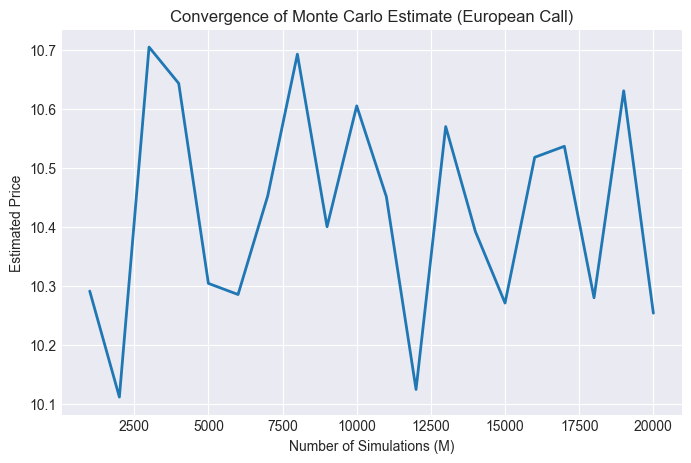

In [31]:
sample_sizes = np.arange(1000, 20001, 1000)
estimates = [price_european_mc(S0, K, r, sigma, T, m, steps) for m in sample_sizes]

plt.figure(figsize=(8,5))
plt.plot(sample_sizes, estimates, lw=2)
plt.title("Convergence of Monte Carlo Estimate (European Call)")
plt.xlabel("Number of Simulations (M)")
plt.ylabel("Estimated Price")
plt.grid(True)
plt.show()

## Path Visualisation

The following figure shows several simulated price paths for a one-year horizon under geometric Brownian motion dynamics.

Here it is essential to pre-append an initial price coloumn before plotting the paths.

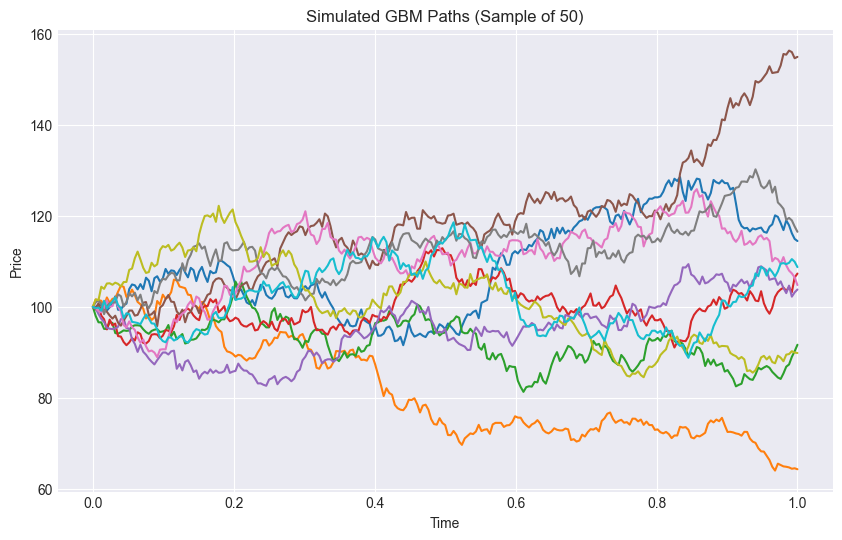

In [32]:
dt = T / steps
Z = np.random.randn(50, steps)
S_paths = S0 * np.exp(np.cumsum((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z, axis=1))
S_paths = np.hstack([np.full((50, 1), S0), S_paths])  # prepend initial price

plot_paths(S_paths.T, T, steps, title="Simulated GBM Paths (Sample of 50)")

## Summary

- Implemented Monte Carlo pricing for European and Asian options under GBM.
- Demonstrated the convergence behaviour of the estimator.
- Illustrated sample paths to provide a more intuative demonstration of simulated price dynamics.